In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from scipy import stats
plt.style.use('ggplot')
%matplotlib inline

In [2]:
aqi_2020_df = pd.read_csv('data/daily_aqi/combined2020aqi.tsv', sep='\t')
historic_aqi_df = pd.read_csv('data/daily_aqi_metro/aggregate_aqi_by_cbsa.csv')

In [3]:
region_relation_dct = {'Mississippi Gulf Coast': 'Gulfport-Biloxi-Pascagoula, MS',
                       'Saint Louis': 'St. Louis, MO-IL',
                       'Missoula': 'Missoula, MT',
                       'Bozeman': 'Bozeman, MT',
                       'Lincoln': 'Lincoln, NE',
                       'Reno-Sparks': 'Reno, NV',
                       'Las Vegas': 'Las Vegas-Henderson-Paradise, NV',
                       'Laconia': 'Laconia, NH',
                       'Newark': 'New York-Newark-Jersey City, NY-NJ-PA', #same mapping is used for NYC
                       'Albuquerque': 'Albuquerque, NM',
                       'Cleveland-Akron-Lorain': 'Cleveland-Elyria, OH',
                       'Tulsa': 'Tulsa, OK',
                       'Portland': 'Portland-Vancouver-Hillsboro, OR-WA',
                       'Pittsburgh': 'Pittsburgh, PA',
                       'Philadelphia': 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD',
                       'Narragansett': 'Providence-Warwick, RI-MA',
                       'Charleston': 'Charleston-North Charleston, SC',
                       'Aberdeen': 'Aberdeen, SD',
                       'Nashville': 'Nashville-Davidson--Murfreesboro--Franklin, TN',
                       'Austin': 'Austin-Round Rock, TX',
                       'Houston-Galveston-Brazoria': 'Houston-The Woodlands-Sugar Land, TX',
                       'Dallas-Fort Worth': 'Dallas-Fort Worth-Arlington, TX',
                       'San Antonio': 'San Antonio-New Braunfels, TX',
                       'Salt Lake City': 'Salt Lake City, UT',
                       'Burlington': 'Burlington-South Burlington, VT',
                       'Richmond': 'Richmond, VA',
                       'Hampton Roads': 'Virginia Beach-Norfolk-Newport News, VA-NC',
                       'Greenbrier County': 'Beckley, WV',
                       'Milwaukee': 'Milwaukee-Waukesha-West Allis, WI',
                       'Jacksonville': 'Jacksonville, FL',
                       'Madison': 'Madison, WI',
                       'Little Rock-North Little Rock': 'Little Rock-North Little Rock-Conway, AR',
                       'Sacramento': 'Sacramento--Roseville--Arden-Arcade, CA',
                       'S Central LA CO': 'Los Angeles-Long Beach-Anaheim, CA', #same mapping is used for NW Coastal LA
                       'NW Coastal LA': 'Los Angeles-Long Beach-Anaheim, CA', #same mapping is used for S Central LA CO
                       'San Francisco': 'San Francisco-Oakland-Hayward, CA',
                       'Denver-Boulder': 'Denver-Aurora-Lakewood, CO',
                       'Hartford': 'Hartford-West Hartford-East Hartford, CT',
                       'Delaware': 'Dover, DE',
                       'Metropolitan Washington': 'Washington-Arlington-Alexandria, DC-VA-MD-WV',
                       'Pensacola': 'Pensacola-Ferry Pass-Brent, FL',
                       'Miami': 'Miami-Fort Lauderdale-West Palm Beach, FL',
                       'Orlando': 'Orlando-Kissimmee-Sanford, FL',
                       'Atlanta': 'Atlanta-Sandy Springs-Roswell, GA',
                       'Honolulu': 'Urban Honolulu, HI',
                       'New York City Region': 'New York-Newark-Jersey City, NY-NJ-PA', #same mapping is used for Newark
                       'Chicago': 'Chicago-Naperville-Elgin, IL-IN-WI',
                       'Boise': 'Boise City, ID',
                       'Springfield': 'Springfield, IL',
                       'Indianapolis': 'Indianapolis-Carmel-Anderson, IN',
                       'Rock Island-Moline': 'Davenport-Moline-Rock Island, IA-IL',
                       'Des Moines': 'Des Moines-West Des Moines, IA',
                       'Wichita': 'Wichita, KS',
                       'Lexington': 'Lexington-Fayette, KY',
                       'New Orleans': 'New Orleans-Metairie, LA',
                       'Metropolitan Baltimore': 'Baltimore-Columbia-Towson, MD',
                       'Detroit': 'Detroit-Warren-Dearborn, MI',
                       'Ann Arbor': 'Ann Arbor, MI',
                       'Grand Rapids': 'Grand Rapids-Wyoming, MI',
                       'Duluth': 'Duluth, MN-WI',
                       'Minneapolis-St. Paul': 'Minneapolis-St. Paul-Bloomington, MN-WI'
}

In [4]:
aqi_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17022 entries, 0 to 17021
Data columns (total 11 columns):
Unnamed: 0       17022 non-null int64
AQI              17022 non-null int64
Category         17022 non-null object
DateObserved     17022 non-null object
HourObserved     17022 non-null int64
Latitude         17022 non-null float64
LocalTimeZone    17022 non-null object
Longitude        17022 non-null float64
ParameterName    17022 non-null object
ReportingArea    17022 non-null object
StateCode        17022 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 1.4+ MB


In [5]:
aqi_2020_df.head()

,Unnamed: 0,AQI,Category,DateObserved,HourObserved,Latitude,LocalTimeZone,Longitude,ParameterName,ReportingArea,StateCode
0,0,47,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS
1,1,30,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,30.37,CST,-89.1,PM2.5,Mississippi Gulf Coast,MS
2,0,49,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS
3,1,43,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,30.37,CST,-89.1,PM2.5,Mississippi Gulf Coast,MS
4,0,44,"{'Number': 1, 'Name': 'Good'}",2020-03-03,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS


In [6]:
historic_aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973473 entries, 0 to 1973472
Data columns (total 9 columns):
Unnamed: 0                   int64
CBSA                         object
CBSA Code                    int64
Date                         object
AQI                          int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting    int64
dtypes: int64(4), object(5)
memory usage: 135.5+ MB


In [7]:
historic_aqi_df.head()

,Unnamed: 0,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,60,"Akron, OH",10420,1980-03-01,84,Moderate,SO2,39-153-0018,4
1,61,"Akron, OH",10420,1980-03-02,109,Unhealthy for Sensitive Groups,SO2,39-153-0018,4
2,62,"Akron, OH",10420,1980-03-03,90,Moderate,SO2,39-153-0018,4
3,63,"Akron, OH",10420,1980-03-04,115,Unhealthy for Sensitive Groups,SO2,39-153-0018,4
4,64,"Akron, OH",10420,1980-03-05,76,Moderate,SO2,39-153-0018,3


In [8]:
def convert_datetime(df, col):
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='ignore')
    return df

In [9]:
historic_aqi_df = convert_datetime(historic_aqi_df, 'Date')


In [10]:
aqi_2020_df['DateObserved'] = pd.to_datetime(aqi_2020_df['DateObserved'], infer_datetime_format=True, errors='coerce', yearfirst=True)

In [11]:
aqi_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17022 entries, 0 to 17021
Data columns (total 11 columns):
Unnamed: 0       17022 non-null int64
AQI              17022 non-null int64
Category         17022 non-null object
DateObserved     17022 non-null datetime64[ns]
HourObserved     17022 non-null int64
Latitude         17022 non-null float64
LocalTimeZone    17022 non-null object
Longitude        17022 non-null float64
ParameterName    17022 non-null object
ReportingArea    17022 non-null object
StateCode        17022 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 1.4+ MB


In [12]:
aqi_2020_df.head()

,Unnamed: 0,AQI,Category,DateObserved,HourObserved,Latitude,LocalTimeZone,Longitude,ParameterName,ReportingArea,StateCode
0,0,47,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS
1,1,30,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,30.37,CST,-89.1,PM2.5,Mississippi Gulf Coast,MS
2,0,49,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS
3,1,43,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,30.37,CST,-89.1,PM2.5,Mississippi Gulf Coast,MS
4,0,44,"{'Number': 1, 'Name': 'Good'}",2020-03-03,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS


In [13]:
historic_aqi_df.head()

,Unnamed: 0,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,60,"Akron, OH",10420,1980-03-01,84,Moderate,SO2,39-153-0018,4
1,61,"Akron, OH",10420,1980-03-02,109,Unhealthy for Sensitive Groups,SO2,39-153-0018,4
2,62,"Akron, OH",10420,1980-03-03,90,Moderate,SO2,39-153-0018,4
3,63,"Akron, OH",10420,1980-03-04,115,Unhealthy for Sensitive Groups,SO2,39-153-0018,4
4,64,"Akron, OH",10420,1980-03-05,76,Moderate,SO2,39-153-0018,3


In [14]:
historic_aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973473 entries, 0 to 1973472
Data columns (total 9 columns):
Unnamed: 0                   int64
CBSA                         object
CBSA Code                    int64
Date                         datetime64[ns]
AQI                          int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting    int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 135.5+ MB


In [15]:
aqi_2020_df = pd.to_datetime(aqi_2020_df, format='%Y-%m-%d', errors='ignore')

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [16]:
aqi_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17022 entries, 0 to 17021
Data columns (total 11 columns):
Unnamed: 0       17022 non-null int64
AQI              17022 non-null int64
Category         17022 non-null object
DateObserved     17022 non-null datetime64[ns]
HourObserved     17022 non-null int64
Latitude         17022 non-null float64
LocalTimeZone    17022 non-null object
Longitude        17022 non-null float64
ParameterName    17022 non-null object
ReportingArea    17022 non-null object
StateCode        17022 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 1.4+ MB


In [17]:
historic_aqi_df = historic_aqi_df.loc[historic_aqi_df['AQI'] != 0]

In [18]:
historic_aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960210 entries, 0 to 1973472
Data columns (total 9 columns):
Unnamed: 0                   int64
CBSA                         object
CBSA Code                    int64
Date                         datetime64[ns]
AQI                          int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting    int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 149.6+ MB


In [19]:
CBSA_arr = historic_aqi_df['CBSA'].unique()

In [20]:
historic_aqi_df.loc[historic_aqi_df['CBSA'] == 'Denver-Aurora-Lakewood, CO'].shape

(4873, 9)

In [21]:
historic_aqi_df.head()

,Unnamed: 0,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,60,"Akron, OH",10420,1980-03-01,84,Moderate,SO2,39-153-0018,4
1,61,"Akron, OH",10420,1980-03-02,109,Unhealthy for Sensitive Groups,SO2,39-153-0018,4
2,62,"Akron, OH",10420,1980-03-03,90,Moderate,SO2,39-153-0018,4
3,63,"Akron, OH",10420,1980-03-04,115,Unhealthy for Sensitive Groups,SO2,39-153-0018,4
4,64,"Akron, OH",10420,1980-03-05,76,Moderate,SO2,39-153-0018,3


In [22]:
historic_CBSA_groups = historic_aqi_df.groupby(['CBSA', 'Date']).mean()['AQI']

In [23]:
#### Making year month day columns

In [24]:
historic_aqi_df['Year'] = historic_aqi_df['Date'].apply(lambda x: x.year)
historic_aqi_df['Month'] = historic_aqi_df['Date'].apply(lambda x: x.month)
historic_aqi_df['Day'] = historic_aqi_df['Date'].apply(lambda x: x.day)

In [25]:
historic_aqi_df.head()

,Unnamed: 0,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year,Month,Day
0,60,"Akron, OH",10420,1980-03-01,84,Moderate,SO2,39-153-0018,4,1980,3,1
1,61,"Akron, OH",10420,1980-03-02,109,Unhealthy for Sensitive Groups,SO2,39-153-0018,4,1980,3,2
2,62,"Akron, OH",10420,1980-03-03,90,Moderate,SO2,39-153-0018,4,1980,3,3
3,63,"Akron, OH",10420,1980-03-04,115,Unhealthy for Sensitive Groups,SO2,39-153-0018,4,1980,3,4
4,64,"Akron, OH",10420,1980-03-05,76,Moderate,SO2,39-153-0018,3,1980,3,5


In [26]:
historic_CBSA_groups = historic_aqi_df.groupby(['CBSA', 'Year', 'Month']).mean()['AQI']

In [27]:
historic_CBSA_groups = historic_CBSA_groups.reset_index()

In [28]:
mar = historic_CBSA_groups[historic_CBSA_groups.Month == 3]
apr = historic_CBSA_groups[historic_CBSA_groups.Month == 4]
may = historic_CBSA_groups[historic_CBSA_groups.Month == 5]
jun = historic_CBSA_groups[historic_CBSA_groups.Month == 6]
month_groups = [mar, apr, may, jun]

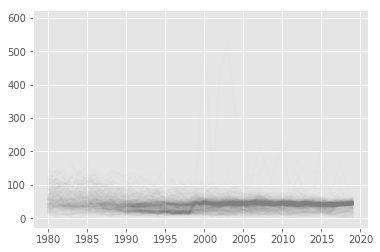

In [29]:
fig, ax = plt.subplots()
for cbsa in mar.CBSA.unique():
    x = mar.loc[mar.CBSA ==cbsa, ['Year']]
    y = mar.loc[mar.CBSA ==cbsa, ['AQI']]
    if cbsa == 'Aberdeen, SD':
        color = 'r'
    else: 
        color = 'grey'
    ax.plot(x, y, color=color, alpha=.01)

In [30]:
mar.CBSA.unique()

array(['Aberdeen, SD', 'Aberdeen, WA', 'Adjuntas, PR', 'Adrian, MI',
       'Aguadilla-Isabela, PR', 'Akron, OH', 'Alamogordo, NM',
       'Albany, GA', 'Albany, OR', 'Albany-Schenectady-Troy, NY',
       'Albert Lea, MN', 'Albuquerque, NM', 'Alexandria, LA',
       'Alexandria, MN', 'Allentown-Bethlehem-Easton, PA-NJ', 'Alma, MI',
       'Alpena, MI', 'Altoona, PA', 'Amarillo, TX', 'Americus, GA',
       'Ames, IA', 'Anchorage, AK', 'Ann Arbor, MI',
       'Anniston-Oxford-Jacksonville, AL', 'Appleton, WI', 'Ardmore, OK',
       'Arkadelphia, AR', 'Asheville, NC', 'Ashtabula, OH', 'Athens, OH',
       'Athens, TN', 'Athens-Clarke County, GA',
       'Atlanta-Sandy Springs-Roswell, GA', 'Atlantic City-Hammonton, NJ',
       'Auburn, IN', 'Augusta-Richmond County, GA-SC',
       'Augusta-Waterville, ME', 'Austin-Round Rock, TX',
       'Bakersfield, CA', 'Baltimore-Columbia-Towson, MD', 'Bangor, ME',
       'Baraboo, WI', 'Barnstable Town, MA', 'Barre, VT',
       'Bartlesville, OK', 'B

In [31]:
historic_CBSA_groups.head()

,CBSA,Year,Month,AQI
0,"Aberdeen, SD",1985,4,19.00
1,"Aberdeen, SD",1985,5,35.75
2,"Aberdeen, SD",1985,6,30.00
3,"Aberdeen, SD",1986,3,19.60
4,"Aberdeen, SD",1986,4,11.00


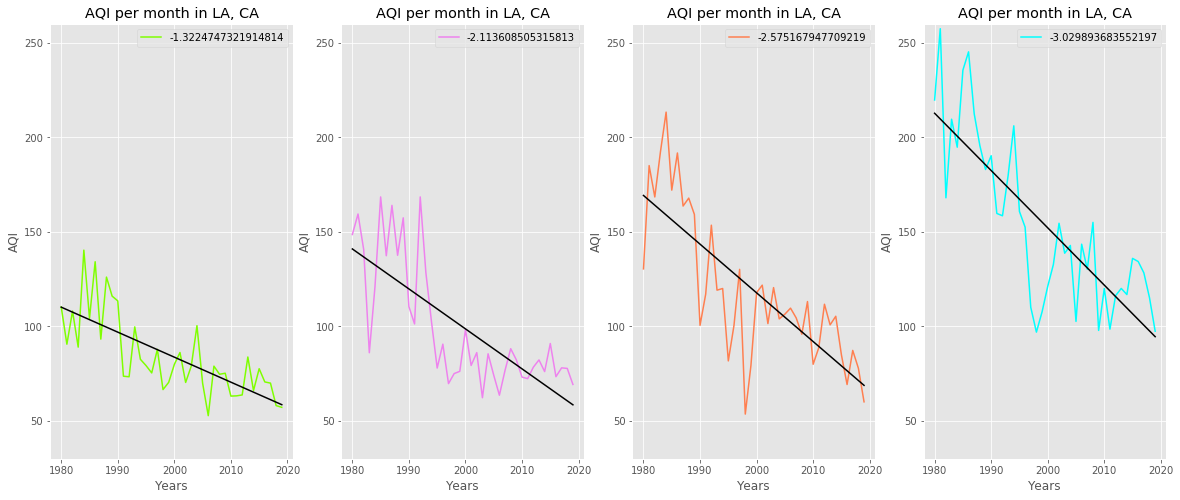

In [32]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))
colors = ['chartreuse', 'violet', 'coral', 'aqua']
for i, mymonth in enumerate(month_groups):
    x = mymonth.loc[mymonth.CBSA == 'Los Angeles-Long Beach-Anaheim, CA', ['Year']]
    y = mymonth.loc[mymonth.CBSA == 'Los Angeles-Long Beach-Anaheim, CA', ['AQI']]
    m, b = np.polyfit(x.Year, y, 1)
    ax[i].plot(x,y, color=colors[i])
    ax[i].plot(x, m*x + b, color='black')
    ax[i].set_xlabel('Years')
    ax[i].set_ylabel('AQI')
    ax[i].set_ylim(30,260)
    ax[i].legend(m)
    
    
    
    ax[i].set_title(f'AQI per month in LA, CA')
    
    
    
plt.savefig('img/test.jpg')   
plt.show()

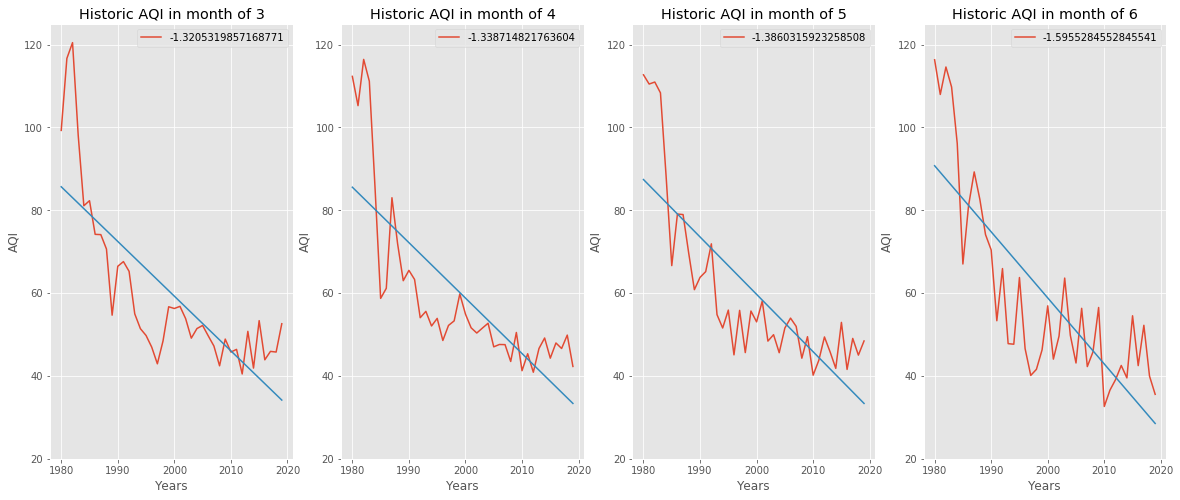

In [33]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))
for i, mymonth in enumerate(month_groups):
    x = mymonth.loc[mymonth.CBSA == 'Seattle-Tacoma-Bellevue, WA', ['Year']]
    y = mymonth.loc[mymonth.CBSA == 'Seattle-Tacoma-Bellevue, WA', ['AQI']]
    m, b = np.polyfit(x.Year, y, 1)
    ax[i].plot(x,y)
    ax[i].plot(x, m*x + b)
    ax[i].set_xlabel('Years')
    ax[i].set_ylabel('AQI')
    ax[i].set_ylim(20,125)
    ax[i].legend(m)
    
    
    
    ax[i].set_title(f'Historic AQI in month of {mymonth.Month.iloc[i]}')
    
    
    
    
    
plt.show()

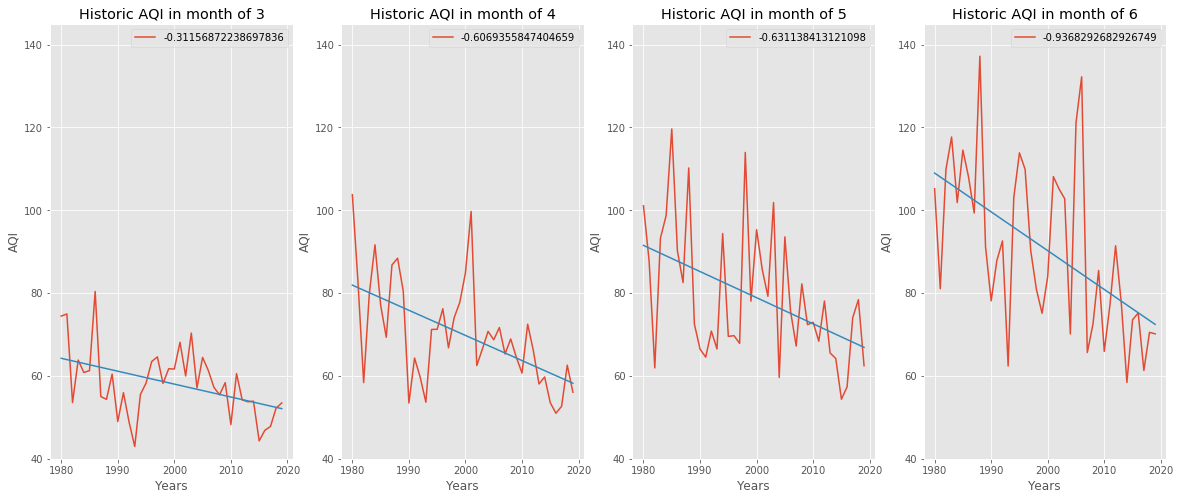

In [34]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))
for i, mymonth in enumerate(month_groups):
    x = mymonth.loc[mymonth.CBSA == 'Dallas-Fort Worth-Arlington, TX', ['Year']]
    y = mymonth.loc[mymonth.CBSA == 'Dallas-Fort Worth-Arlington, TX', ['AQI']]
    m, b = np.polyfit(x.Year, y, 1)
    ax[i].plot(x,y)
    ax[i].plot(x, m*x + b)
    ax[i].set_xlabel('Years')
    ax[i].set_ylabel('AQI')
    ax[i].set_ylim(40,145)
    ax[i].legend(m)
    
    
    
    ax[i].set_title(f'Historic AQI in month of {mymonth.Month.iloc[i]}')
    
    
    
    
    
plt.show()

In [35]:
historic_CBSA_groups_monthly_mean = historic_aqi_df.groupby(['CBSA', 'Month']).mean()['AQI'].reset_index()
historic_CBSA_groups_monthly_mean

,CBSA,Month,AQI
0,"Aberdeen, SD",3,30.586957
1,"Aberdeen, SD",4,27.518349
2,"Aberdeen, SD",5,27.579399
3,"Aberdeen, SD",6,29.750000
4,"Aberdeen, WA",3,36.082256
5,"Aberdeen, WA",4,35.899128
6,"Aberdeen, WA",5,36.234611
7,"Aberdeen, WA",6,38.428400
8,"Adjuntas, PR",3,20.647059
9,"Adjuntas, PR",4,23.666667


In [36]:
historic_CBSA_groups_monthly_mean.loc[historic_CBSA_groups_monthly_mean['CBSA'] == 'Yuma, AZ', ['AQI']]

,AQI
2765,37.622951
2766,62.391101
2767,66.653513
2768,62.450195


In [37]:
historic_CBSA_groups_monthly_mean['CBSA'].unique()

array(['Aberdeen, SD', 'Aberdeen, WA', 'Adjuntas, PR', 'Adrian, MI',
       'Aguadilla-Isabela, PR', 'Akron, OH', 'Alamogordo, NM',
       'Albany, GA', 'Albany, OR', 'Albany-Schenectady-Troy, NY',
       'Albert Lea, MN', 'Albuquerque, NM', 'Alexandria, LA',
       'Alexandria, MN', 'Allentown-Bethlehem-Easton, PA-NJ', 'Alma, MI',
       'Alpena, MI', 'Altoona, PA', 'Amarillo, TX', 'Americus, GA',
       'Ames, IA', 'Anchorage, AK', 'Ann Arbor, MI',
       'Anniston-Oxford-Jacksonville, AL', 'Appleton, WI', 'Ardmore, OK',
       'Arkadelphia, AR', 'Asheville, NC', 'Ashtabula, OH', 'Athens, OH',
       'Athens, TN', 'Athens-Clarke County, GA',
       'Atlanta-Sandy Springs-Roswell, GA', 'Atlantic City-Hammonton, NJ',
       'Auburn, IN', 'Augusta-Richmond County, GA-SC',
       'Augusta-Waterville, ME', 'Austin-Round Rock, TX',
       'Bakersfield, CA', 'Baltimore-Columbia-Towson, MD', 'Bangor, ME',
       'Baraboo, WI', 'Barnstable Town, MA', 'Barre, VT',
       'Bartlesville, OK', 'B

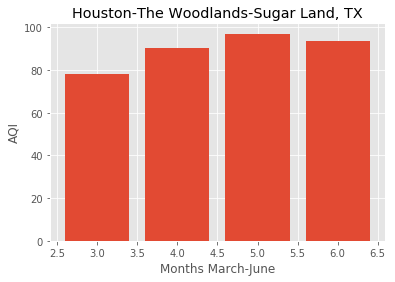

In [38]:
fig, ax = plt.subplots()
x = historic_CBSA_groups_monthly_mean.loc[historic_CBSA_groups_monthly_mean['CBSA'] == 'Houston-The Woodlands-Sugar Land, TX', ['Month']]
y = historic_CBSA_groups_monthly_mean.loc[historic_CBSA_groups_monthly_mean['CBSA'] == 'Houston-The Woodlands-Sugar Land, TX', ['AQI']]
ax.bar(x.Month ,y.AQI)
ax.set_xlabel('Months March-June')
ax.set_ylabel('AQI')
ax.set_title('Houston-The Woodlands-Sugar Land, TX')
plt.show()



### filtering to the correct AQI value in 2020 dataset

In [39]:
aqi_2020_df.head()

,Unnamed: 0,AQI,Category,DateObserved,HourObserved,Latitude,LocalTimeZone,Longitude,ParameterName,ReportingArea,StateCode
0,0,47,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS
1,1,30,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,30.37,CST,-89.1,PM2.5,Mississippi Gulf Coast,MS
2,0,49,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS
3,1,43,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,30.37,CST,-89.1,PM2.5,Mississippi Gulf Coast,MS
4,0,44,"{'Number': 1, 'Name': 'Good'}",2020-03-03,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS


In [40]:
aqi_singleton = aqi_2020_df.groupby(['ReportingArea', 'StateCode', 'DateObserved']).max()['AQI'].reset_index()

In [41]:
aqi_singleton['Year'] = aqi_singleton['DateObserved'].apply(lambda x: x.year)
aqi_singleton['Month'] = aqi_singleton['DateObserved'].apply(lambda x: x.month)
aqi_singleton['Day'] = aqi_singleton['DateObserved'].apply(lambda x: x.day)

In [42]:
aqi_singleton.head()

,ReportingArea,StateCode,DateObserved,AQI,Year,Month,Day
0,Aberdeen,SD,2020-03-01,22,2020,3,1
1,Aberdeen,SD,2020-03-02,24,2020,3,2
2,Aberdeen,SD,2020-03-03,20,2020,3,3
3,Aberdeen,SD,2020-03-04,22,2020,3,4
4,Aberdeen,SD,2020-03-05,28,2020,3,5


In [43]:
aqi_singleton['ReportingArea'].unique()

array(['Aberdeen', 'Albuquerque', 'Ann Arbor', 'Atlanta', 'Austin',
       'Boise', 'Bozeman', 'Burlington', 'Charleston', 'Chicago',
       'Cleveland-Akron-Lorain', 'Dallas-Fort Worth', 'Delaware',
       'Denver-Boulder', 'Des Moines', 'Detroit', 'Duluth',
       'Grand Rapids', 'Greenbrier County', 'Hampton Roads', 'Hartford',
       'Honolulu', 'Houston-Galveston-Brazoria', 'Indianapolis',
       'Jacksonville', 'Laconia', 'Las Vegas', 'Lexington', 'Lincoln',
       'Little Rock-North Little Rock', 'Madison',
       'Metropolitan Baltimore', 'Metropolitan Washington', 'Miami',
       'Milwaukee', 'Minneapolis-St. Paul', 'Mississippi Gulf Coast',
       'Missoula', 'NW Coastal LA', 'Narragansett', 'Nashville',
       'New Orleans', 'New York City Region', 'Newark', 'Orlando',
       'Pensacola', 'Philadelphia', 'Pittsburgh', 'Portland',
       'Reno-Sparks', 'Richmond', 'Rock Island-Moline', 'S Central LA CO',
       'Sacramento', 'Saint Louis', 'Salt Lake City', 'San Antonio',
   

In [44]:
historic_CBSA_groups_monthly_mean['CBSA'].unique()

array(['Aberdeen, SD', 'Aberdeen, WA', 'Adjuntas, PR', 'Adrian, MI',
       'Aguadilla-Isabela, PR', 'Akron, OH', 'Alamogordo, NM',
       'Albany, GA', 'Albany, OR', 'Albany-Schenectady-Troy, NY',
       'Albert Lea, MN', 'Albuquerque, NM', 'Alexandria, LA',
       'Alexandria, MN', 'Allentown-Bethlehem-Easton, PA-NJ', 'Alma, MI',
       'Alpena, MI', 'Altoona, PA', 'Amarillo, TX', 'Americus, GA',
       'Ames, IA', 'Anchorage, AK', 'Ann Arbor, MI',
       'Anniston-Oxford-Jacksonville, AL', 'Appleton, WI', 'Ardmore, OK',
       'Arkadelphia, AR', 'Asheville, NC', 'Ashtabula, OH', 'Athens, OH',
       'Athens, TN', 'Athens-Clarke County, GA',
       'Atlanta-Sandy Springs-Roswell, GA', 'Atlantic City-Hammonton, NJ',
       'Auburn, IN', 'Augusta-Richmond County, GA-SC',
       'Augusta-Waterville, ME', 'Austin-Round Rock, TX',
       'Bakersfield, CA', 'Baltimore-Columbia-Towson, MD', 'Bangor, ME',
       'Baraboo, WI', 'Barnstable Town, MA', 'Barre, VT',
       'Bartlesville, OK', 'B

In [45]:
aqi_singleton_monthly_mean = aqi_singleton.groupby(['ReportingArea', 'Month']).mean()['AQI'].reset_index()

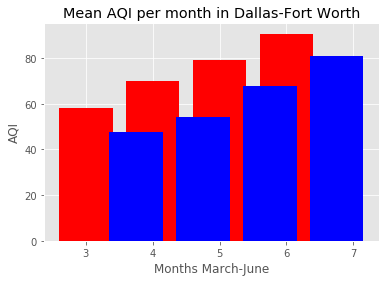

In [46]:
fig, ax = plt.subplots()
N = 4
width = .75
x = historic_CBSA_groups_monthly_mean.loc[historic_CBSA_groups_monthly_mean['CBSA'] == 'Dallas-Fort Worth-Arlington, TX', ['Month']]
y = historic_CBSA_groups_monthly_mean.loc[historic_CBSA_groups_monthly_mean['CBSA'] == 'Dallas-Fort Worth-Arlington, TX', ['AQI']]
x_a = aqi_singleton_monthly_mean.loc[aqi_singleton_monthly_mean['ReportingArea'] == 'Dallas-Fort Worth', ['Month']]
y_a = aqi_singleton_monthly_mean.loc[aqi_singleton_monthly_mean['ReportingArea'] == 'Dallas-Fort Worth', ['AQI']]
ax.bar(x.Month ,y.AQI, color='red')
ax.bar(x_a.Month+width, y_a.AQI, color='blue')

ax.set_xlabel('Months March-June')
ax.set_ylabel('AQI')
ax.set_title('Mean AQI per month in Dallas-Fort Worth')
plt.show()


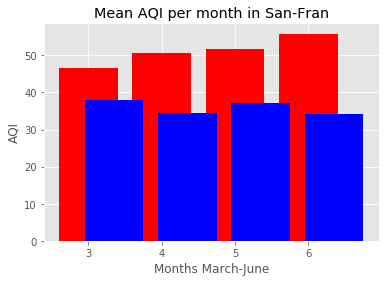

In [47]:
fig, ax = plt.subplots()

width = .35
x = historic_CBSA_groups_monthly_mean.loc[historic_CBSA_groups_monthly_mean['CBSA'] == 'San Francisco-Oakland-Hayward, CA', ['Month']]
y = historic_CBSA_groups_monthly_mean.loc[historic_CBSA_groups_monthly_mean['CBSA'] == 'San Francisco-Oakland-Hayward, CA', ['AQI']]
x_a = aqi_singleton_monthly_mean.loc[aqi_singleton_monthly_mean['ReportingArea'] == 'San Francisco', ['Month']]
y_a = aqi_singleton_monthly_mean.loc[aqi_singleton_monthly_mean['ReportingArea'] == 'San Francisco', ['AQI']]
ax.bar(x.Month ,y.AQI, color='red')
ax.bar(x_a.Month+width, y_a.AQI, color='blue')

ax.set_xlabel('Months March-June')
ax.set_ylabel('AQI')
ax.set_title('Mean AQI per month in San-Fran')
plt.show()

In [48]:
aqi_singleton.head()

,ReportingArea,StateCode,DateObserved,AQI,Year,Month,Day
0,Aberdeen,SD,2020-03-01,22,2020,3,1
1,Aberdeen,SD,2020-03-02,24,2020,3,2
2,Aberdeen,SD,2020-03-03,20,2020,3,3
3,Aberdeen,SD,2020-03-04,22,2020,3,4
4,Aberdeen,SD,2020-03-05,28,2020,3,5


In [49]:
aqi_singleton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 7 columns):
ReportingArea    7608 non-null object
StateCode        7608 non-null object
DateObserved     7608 non-null datetime64[ns]
AQI              7608 non-null int64
Year             7608 non-null int64
Month            7608 non-null int64
Day              7608 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 416.1+ KB


In [50]:
historic_aqi_df.columns

Index(['Unnamed: 0', 'CBSA', 'CBSA Code', 'Date', 'AQI', 'Category',
       'Defining Parameter', 'Defining Site', 'Number of Sites Reporting',
       'Year', 'Month', 'Day'],
      dtype='object')

In [51]:
aqi_singleton.columns

Index(['ReportingArea', 'StateCode', 'DateObserved', 'AQI', 'Year', 'Month',
       'Day'],
      dtype='object')

In [52]:
aqi_singleton['CBSA'] = aqi_singleton['ReportingArea'].replace(region_relation_dct)

In [53]:
aqi_singleton.head()

,ReportingArea,StateCode,DateObserved,AQI,Year,Month,Day,CBSA
0,Aberdeen,SD,2020-03-01,22,2020,3,1,"Aberdeen, SD"
1,Aberdeen,SD,2020-03-02,24,2020,3,2,"Aberdeen, SD"
2,Aberdeen,SD,2020-03-03,20,2020,3,3,"Aberdeen, SD"
3,Aberdeen,SD,2020-03-04,22,2020,3,4,"Aberdeen, SD"
4,Aberdeen,SD,2020-03-05,28,2020,3,5,"Aberdeen, SD"


In [54]:
aqi_singleton_updated = aqi_singleton.groupby(['CBSA', 'DateObserved', 'Year', 'Month', 'Day'])['AQI'].mean().reset_index()

In [55]:
CBSA_2020 = aqi_singleton_updated['CBSA'].unique()

In [56]:
len(historic_aqi_df['CBSA'].unique())

695

In [57]:
historic_aqi_trimmed = historic_aqi_df[historic_aqi_df['CBSA'].isin(CBSA_2020)]

In [58]:
len(historic_aqi_trimmed['CBSA'].unique())

59

In [59]:
1800000*.08


144000.0

In [60]:
historic_aqi_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273183 entries, 244 to 1971969
Data columns (total 12 columns):
Unnamed: 0                   273183 non-null int64
CBSA                         273183 non-null object
CBSA Code                    273183 non-null int64
Date                         273183 non-null datetime64[ns]
AQI                          273183 non-null int64
Category                     273183 non-null object
Defining Parameter           273183 non-null object
Defining Site                273183 non-null object
Number of Sites Reporting    273183 non-null int64
Year                         273183 non-null int64
Month                        273183 non-null int64
Day                          273183 non-null int64
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 27.1+ MB


In [61]:
historic_aqi_trimmed_2019 = historic_aqi_trimmed[historic_aqi_trimmed['Year'] == 2019].reset_index()

In [62]:
historic_aqi_trimmed_2019.head()

,index,Unnamed: 0,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year,Month,Day
0,1912660,19,"Aberdeen, SD",10100,2019-03-01,29,Good,PM2.5,46-013-0003,1,2019,3,1
1,1912661,20,"Aberdeen, SD",10100,2019-03-04,30,Good,PM2.5,46-013-0003,1,2019,3,4
2,1912662,21,"Aberdeen, SD",10100,2019-03-07,25,Good,PM2.5,46-013-0003,1,2019,3,7
3,1912663,22,"Aberdeen, SD",10100,2019-03-10,36,Good,PM2.5,46-013-0003,1,2019,3,10
4,1912664,23,"Aberdeen, SD",10100,2019-03-13,42,Good,PM2.5,46-013-0003,1,2019,3,13


In [63]:
historic_aqi_trimmed_2019.columns

Index(['index', 'Unnamed: 0', 'CBSA', 'CBSA Code', 'Date', 'AQI', 'Category',
       'Defining Parameter', 'Defining Site', 'Number of Sites Reporting',
       'Year', 'Month', 'Day'],
      dtype='object')

In [64]:
historic_aqi_trimmed_2019.drop(['index', 'Unnamed: 0'], axis=1)

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year,Month,Day
0,"Aberdeen, SD",10100,2019-03-01,29,Good,PM2.5,46-013-0003,1,2019,3,1
1,"Aberdeen, SD",10100,2019-03-04,30,Good,PM2.5,46-013-0003,1,2019,3,4
2,"Aberdeen, SD",10100,2019-03-07,25,Good,PM2.5,46-013-0003,1,2019,3,7
3,"Aberdeen, SD",10100,2019-03-10,36,Good,PM2.5,46-013-0003,1,2019,3,10
4,"Aberdeen, SD",10100,2019-03-13,42,Good,PM2.5,46-013-0003,1,2019,3,13
5,"Aberdeen, SD",10100,2019-03-16,56,Moderate,PM2.5,46-013-0003,1,2019,3,16
6,"Aberdeen, SD",10100,2019-03-19,51,Moderate,PM2.5,46-013-0003,1,2019,3,19
7,"Aberdeen, SD",10100,2019-03-22,37,Good,PM2.5,46-013-0003,1,2019,3,22
8,"Aberdeen, SD",10100,2019-03-25,21,Good,PM2.5,46-013-0003,1,2019,3,25
9,"Aberdeen, SD",10100,2019-03-28,15,Good,PM2.5,46-013-0003,1,2019,3,28


In [65]:
aqi_CBSA_2019_mean = historic_aqi_trimmed_2019.groupby(['CBSA', 'Year'])['AQI'].mean().reset_index()

In [66]:
aqi_CBSA_2019_mean

,CBSA,Year,AQI
0,"Aberdeen, SD",2019,23.853659
1,"Albuquerque, NM",2019,58.860656
2,"Ann Arbor, MI",2019,43.172131
3,"Atlanta-Sandy Springs-Roswell, GA",2019,59.959016
4,"Austin-Round Rock, TX",2019,49.467213
5,"Baltimore-Columbia-Towson, MD",2019,54.163934
6,"Boise City, ID",2019,39.401639
7,"Bozeman, MT",2019,24.352459
8,"Burlington-South Burlington, VT",2019,40.540984
9,"Charleston-North Charleston, SC",2019,48.319672


In [67]:
aqi_CBSA_2020_mean = aqi_singleton.groupby(['CBSA', 'Year'])['AQI'].mean().reset_index()

In [68]:
aqi_CBSA_2020_mean = aqi_CBSA_2020_mean[aqi_CBSA_2020_mean['CBSA'] != 'Soda Springs (seasonal)']

In [69]:
aqi_CBSA_2020_mean = aqi_CBSA_2020_mean[aqi_CBSA_2020_mean['CBSA'] != 'Beckley, WV']

In [70]:
aqi_CBSA_2020_mean = aqi_CBSA_2020_mean[aqi_CBSA_2020_mean['CBSA'] != 'Southwest Coast']

In [71]:
aqi_CBSA_2020_mean = aqi_CBSA_2020_mean.reset_index()

In [72]:
aqi_CBSA_2020_mean = aqi_CBSA_2020_mean.drop('index', axis=1)

In [73]:
CBSA_arr = aqi_CBSA_2020_mean['CBSA'].unique()
std_dev_2020 = []
std_dev_2019 = []

for metro_area in CBSA_arr:
    std_dev_2020.append(np.std(aqi_singleton_updated[aqi_singleton_updated['CBSA'] == 'f{metro_area}']['AQI']))
    return std_dev_2020
    

SyntaxError: 'return' outside function (<ipython-input-73-9238cdcfc00e>, line 7)

In [74]:
np.std(aqi_singleton_updated[aqi_singleton_updated['CBSA'] == 'Aberdeen, SD']['AQI'])

11.666526214585645

In [75]:
std_2020 = aqi_singleton_updated.groupby('CBSA')['AQI'].std().reset_index()

In [76]:
std_2019 = historic_aqi_trimmed_2019.groupby('CBSA')['AQI'].std().reset_index()

In [77]:
std_2020 = std_2020[std_2020['CBSA'] != 'Soda Springs (seasonal)']

In [78]:
std_2020 = std_2020[std_2020['CBSA'] != 'Beckley, WV']

In [79]:
std_2020 = std_2020[std_2020['CBSA'] != 'Southwest Coast']

In [80]:
std_2020 = std_2020.reset_index()

In [81]:
std_2020 = std_2020.drop('index', axis=1)


In [82]:
std_2020 = std_2020.rename(columns={'AQI': 'AQI_STDev'})

In [83]:
std_2019 = std_2019.rename(columns={'AQI': 'AQI_STDev'})

In [84]:
aqi_2019_mean_std = aqi_CBSA_2019_mean.merge(std_2019, on='CBSA', how='left')

In [85]:
aqi_2020_mean_std = aqi_CBSA_2020_mean.merge(std_2020, on='CBSA', how='left')

In [86]:
aqi_2019_mean_std

,CBSA,Year,AQI,AQI_STDev
0,"Aberdeen, SD",2019,23.853659,15.452445
1,"Albuquerque, NM",2019,58.860656,14.580251
2,"Ann Arbor, MI",2019,43.172131,9.218821
3,"Atlanta-Sandy Springs-Roswell, GA",2019,59.959016,20.269832
4,"Austin-Round Rock, TX",2019,49.467213,13.018223
5,"Baltimore-Columbia-Towson, MD",2019,54.163934,18.354796
6,"Boise City, ID",2019,39.401639,7.712456
7,"Bozeman, MT",2019,24.352459,15.456108
8,"Burlington-South Burlington, VT",2019,40.540984,6.367723
9,"Charleston-North Charleston, SC",2019,48.319672,15.757599


In [87]:
aqi_2020_mean_std.to_csv('data/daily_aqi_metro/aqi_2020_mean_std.csv')

In [88]:
aqi_2019_mean_std.to_csv('data/daily_aqi_metro/aqi_2019_mean_std.csv')

In [89]:
aqi_2020_mean_std

,CBSA,Year,AQI,AQI_STDev
0,"Aberdeen, SD",2020,23.122951,11.714636
1,"Albuquerque, NM",2020,54.237705,11.633560
2,"Ann Arbor, MI",2020,45.032787,15.756376
3,"Atlanta-Sandy Springs-Roswell, GA",2020,48.475410,14.083114
4,"Austin-Round Rock, TX",2020,49.083333,15.746192
5,"Baltimore-Columbia-Towson, MD",2020,44.778689,10.521534
6,"Boise City, ID",2020,39.524590,9.390705
7,"Bozeman, MT",2020,15.237705,8.419824
8,"Burlington-South Burlington, VT",2020,39.155738,7.912769
9,"Charleston-North Charleston, SC",2020,42.016393,11.019880


In [90]:
aqi_singleton_updated = aqi_singleton_updated[aqi_singleton_updated['CBSA'] != 'Beckley, WV']

In [91]:
aqi_singleton_updated = aqi_singleton_updated[aqi_singleton_updated['CBSA'] != 'Soda Springs (seasonal)']

In [92]:
aqi_singleton_updated = aqi_singleton_updated[aqi_singleton_updated['CBSA'] != 'Southwest Coast']

In [93]:
final_results = []
for metro_area in CBSA_arr:
    t_stat, p_value = stats.ttest_ind(aqi_singleton_updated.loc[aqi_singleton_updated['CBSA'] == metro_area]['AQI'], 
                                      historic_aqi_trimmed_2019.loc[historic_aqi_trimmed_2019['CBSA'] == metro_area]['AQI'])
    
    row = {}
    row['metro_area'] = metro_area
    row['t_stat'] = t_stat
    row['p_value'] = p_value
    final_results.append(row)

    

In [94]:
ttest_df = pd.DataFrame(final_results)

In [95]:
ttest_df

,metro_area,p_value,t_stat
0,"Aberdeen, SD",7.512186e-01,-0.317575
1,"Albuquerque, NM",6.650078e-03,-2.737520
2,"Ann Arbor, MI",2.613659e-01,1.125799
3,"Atlanta-Sandy Springs-Roswell, GA",5.691801e-07,-5.138995
4,"Austin-Round Rock, TX",8.363124e-01,-0.206837
5,"Baltimore-Columbia-Towson, MD",1.757172e-06,-4.899818
6,"Boise City, ID",9.111099e-01,0.111756
7,"Bozeman, MT",3.130471e-08,-5.719985
8,"Burlington-South Burlington, VT",1.332587e-01,-1.506439
9,"Charleston-North Charleston, SC",3.577619e-04,-3.620749


In [449]:
ttest_df.to_csv('data/daily_aqi_metro/ttest.csv')

In [453]:
ttest_df['null_rejection'] = 0

In [96]:
ttest_df.loc[ttest_df['p_value'] < 0.01, 'null_rejection'] = 1

In [108]:
len(ttest_df.loc[ttest_df['null_rejection'] == 1])

30

In [98]:
ttest_df1 = ttest_df.rename(columns={'metro_area': 'CBSA'})


In [99]:
aqi_2019_mean_std

,CBSA,Year,AQI,AQI_STDev
0,"Aberdeen, SD",2019,23.853659,15.452445
1,"Albuquerque, NM",2019,58.860656,14.580251
2,"Ann Arbor, MI",2019,43.172131,9.218821
3,"Atlanta-Sandy Springs-Roswell, GA",2019,59.959016,20.269832
4,"Austin-Round Rock, TX",2019,49.467213,13.018223
5,"Baltimore-Columbia-Towson, MD",2019,54.163934,18.354796
6,"Boise City, ID",2019,39.401639,7.712456
7,"Bozeman, MT",2019,24.352459,15.456108
8,"Burlington-South Burlington, VT",2019,40.540984,6.367723
9,"Charleston-North Charleston, SC",2019,48.319672,15.757599


In [100]:
aqi_2020_mean_std

,CBSA,Year,AQI,AQI_STDev
0,"Aberdeen, SD",2020,23.122951,11.714636
1,"Albuquerque, NM",2020,54.237705,11.633560
2,"Ann Arbor, MI",2020,45.032787,15.756376
3,"Atlanta-Sandy Springs-Roswell, GA",2020,48.475410,14.083114
4,"Austin-Round Rock, TX",2020,49.083333,15.746192
5,"Baltimore-Columbia-Towson, MD",2020,44.778689,10.521534
6,"Boise City, ID",2020,39.524590,9.390705
7,"Bozeman, MT",2020,15.237705,8.419824
8,"Burlington-South Burlington, VT",2020,39.155738,7.912769
9,"Charleston-North Charleston, SC",2020,42.016393,11.019880


In [101]:
aqi_2019_mean_std_adj = aqi_2019_mean_std.rename(columns={'AQI': 'AQI_2019'})

In [102]:
aqi_2020_mean_std_adj = aqi_2020_mean_std.rename(columns={'AQI': 'AQI_2020'})

In [103]:
combo_mean_aqi2 = aqi_2020_mean_std_adj.merge(aqi_2019_mean_std_adj, how='outer', on='CBSA')

In [104]:
combo_mean_aqi2 = combo_mean_aqi2.merge(ttest_df1, how='outer', on='CBSA')

In [105]:
combo_mean_aqi2 = combo_mean_aqi2.rename(columns={'AQI_STDev_x': 'AQI_STDev2020', 'AQI_STDev_y': 'AQI_STDev2019'})

In [106]:
combo_mean_aqi2 = combo_mean_aqi2[['CBSA', 'Year_y', 'AQI_2019', 'AQI_STDev2019', 'Year_x', 'AQI_2020', 'AQI_STDev2020', 'p_value', 't_stat', 'null_rejection']]

In [107]:
combo_mean_aqi2.head()

,CBSA,Year_y,AQI_2019,AQI_STDev2019,Year_x,AQI_2020,AQI_STDev2020,p_value,t_stat,null_rejection
0,"Aberdeen, SD",2019,23.853659,15.452445,2020,23.122951,11.714636,7.512186e-01,-0.317575,NaN
1,"Albuquerque, NM",2019,58.860656,14.580251,2020,54.237705,11.633560,6.650078e-03,-2.737520,1.0
2,"Ann Arbor, MI",2019,43.172131,9.218821,2020,45.032787,15.756376,2.613659e-01,1.125799,NaN
3,"Atlanta-Sandy Springs-Roswell, GA",2019,59.959016,20.269832,2020,48.475410,14.083114,5.691801e-07,-5.138995,1.0
4,"Austin-Round Rock, TX",2019,49.467213,13.018223,2020,49.083333,15.746192,8.363124e-01,-0.206837,NaN


In [533]:
combo_mean_aqi2_2half = combo_mean_aqi2[30:]

In [534]:
combo_mean_aqi2_2half

,CBSA,Year_y,AQI_2019,AQI_STDev2019,Year_x,AQI_2020,AQI_STDev2020,p_value,t_stat,null_rejection
30,"Los Angeles-Long Beach-Anaheim, CA",2019,70.836066,29.210369,2020,39.810700,10.467196,2.881193e-23,-11.055411,1
31,"Madison, WI",2019,43.434426,12.006877,2020,44.433333,14.277992,5.561497e-01,0.589397,0
32,"Miami-Fort Lauderdale-West Palm Beach, FL",2019,46.540984,14.496023,2020,43.626087,12.632776,1.010669e-01,-1.646163,0
33,"Milwaukee-Waukesha-West Allis, WI",2019,47.090164,12.352939,2020,47.099174,20.421559,9.966803e-01,0.004165,0
34,"Minneapolis-St. Paul-Bloomington, MN-WI",2019,51.524590,15.588835,2020,36.172131,11.048872,1.594928e-16,-8.874794,1
35,"Missoula, MT",2019,36.254098,19.046078,2020,37.918033,7.367104,3.690245e-01,0.899982,0
36,"Nashville-Davidson--Murfreesboro--Franklin, TN",2019,48.836066,11.284716,2020,44.016393,12.806883,2.036163e-03,-3.118758,1
37,"New Orleans-Metairie, LA",2019,52.655738,12.837040,2020,46.327869,13.372256,2.047661e-04,-3.770566,1
38,"New York-Newark-Jersey City, NY-NJ-PA",2019,56.401639,17.917008,2020,42.725410,11.160198,9.839963e-12,-7.156303,1
39,"Orlando-Kissimmee-Sanford, FL",2019,50.000000,19.085281,2020,42.271186,11.730347,2.102395e-04,-3.764563,1


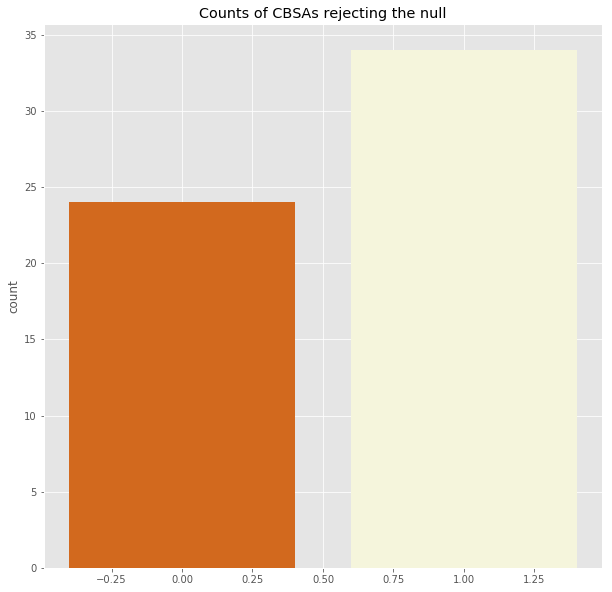

In [580]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(0, len(combo_mean_aqi2.loc[combo_mean_aqi2['null_rejection'] == 0]), color='chocolate')
ax.bar(1, len(combo_mean_aqi2.loc[combo_mean_aqi2['null_rejection'] == 1]), color='beige')
ax.set_title('Counts of CBSAs rejecting the null')
ax.set_ylabel('count')
plt.savefig('img/nullreject.png')
plt.show()

In [576]:
len(combo_mean_aqi2.loc[combo_mean_aqi2['null_rejection'] == 1])

34

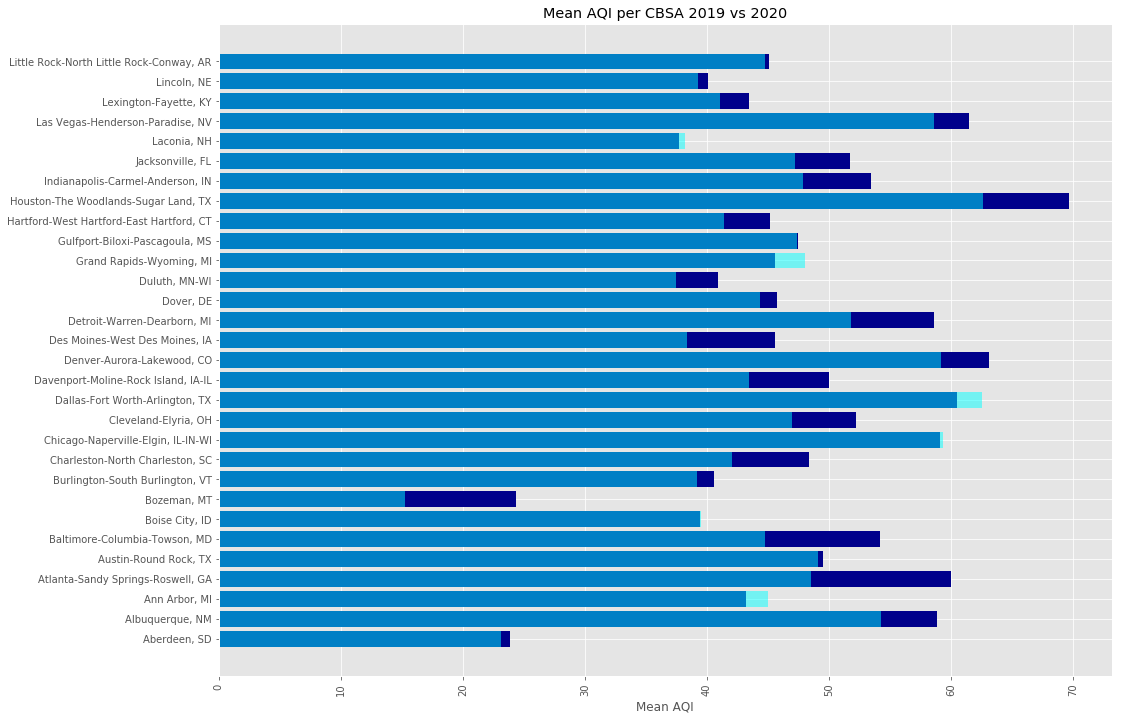

In [567]:
fig, ax = plt.subplots(figsize=(16,12))
width = 0.25
ax.barh(combo_mean_aqi2_1half['CBSA'], combo_mean_aqi2_1half['AQI_2019'], color='darkblue')
ax.barh(combo_mean_aqi2_1half['CBSA'], combo_mean_aqi2_1half['AQI_2020'], color='cyan', alpha=0.5)
ax.set_xlabel('Mean AQI')
ax.set_title('Mean AQI per CBSA 2019 vs 2020')
plt.xticks(rotation='vertical')
plt.savefig('img/meanAQIcomp2.png')
plt.show()




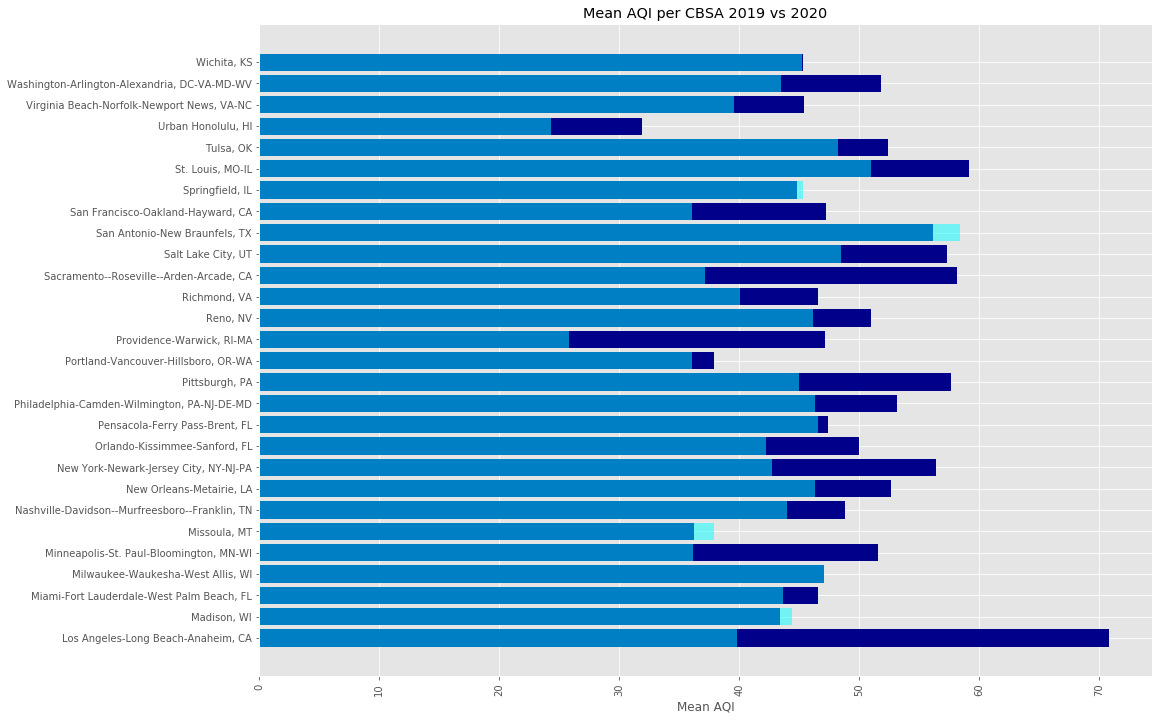

In [564]:
fig, ax = plt.subplots(figsize=(16,12))

ax.barh(combo_mean_aqi2_2half['CBSA'], combo_mean_aqi2_2half['AQI_2019'], color='darkblue')
ax.barh(combo_mean_aqi2_2half['CBSA'], combo_mean_aqi2_2half['AQI_2020'], color ='cyan', alpha=0.5)
ax.set_xlabel('Mean AQI')
ax.set_title('Mean AQI per CBSA 2019 vs 2020')
plt.xticks(rotation='vertical')
plt.savefig('img/meanAQIcomp1.png')
plt.show()

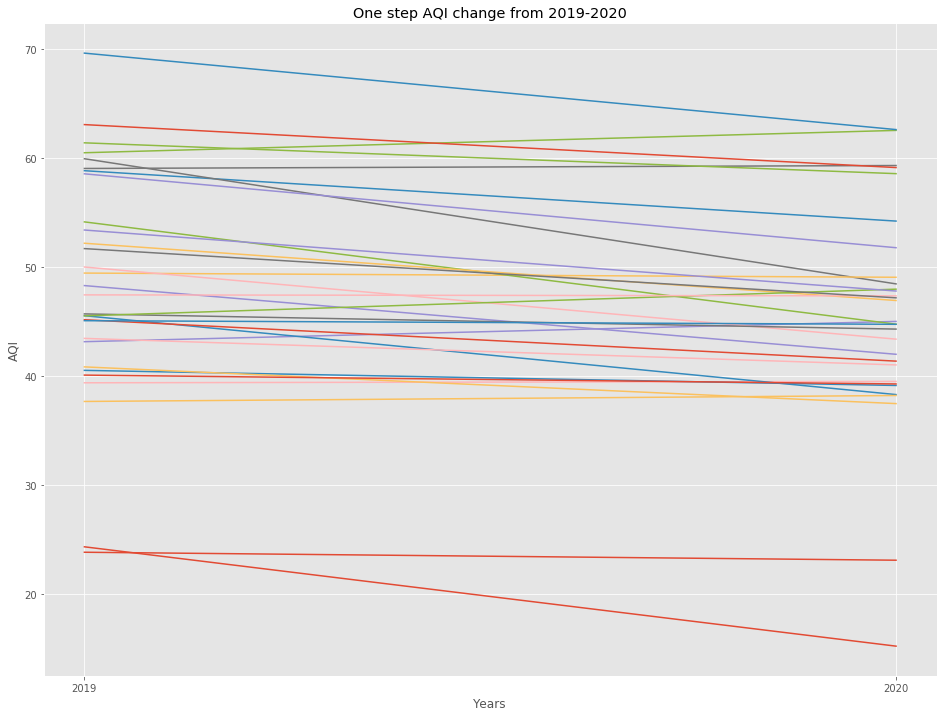

In [568]:
fig, ax = plt.subplots(figsize=(16,12))
years = ['2019', '2020']

for y1, y2 in zip(combo_mean_aqi2_1half['AQI_2019'], combo_mean_aqi2_1half['AQI_2020']):
    ax.plot(years, [y1, y2])
    ax.set_xlabel('Years')
    ax.set_ylabel('AQI')
    ax.set_title('One step AQI change from 2019-2020')
plt.savefig('img/onestep.png')
plt.show()



In [525]:
historic_month_comparison1 = historic_aqi_df.groupby('Year')['AQI'].mean().reset_index()

In [526]:
historic_month_comparison1

,Year,AQI
0,1980,67.007326
1,1981,66.174074
2,1982,64.245616
3,1983,61.874053
4,1984,64.026413
5,1985,65.716394
6,1986,63.964374
7,1987,63.265745
8,1988,66.168806
9,1989,56.631716


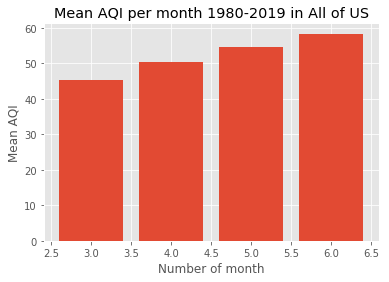

In [524]:
fig, ax = plt.subplots()
ax.bar(historic_month_comparison['Month'], historic_month_comparison['AQI'])
ax.set_title('Mean AQI per month 1980-2019 in All of US')
ax.set_xlabel('Number of month')
ax.set_ylabel('Mean AQI')
plt.savefig('img/historic_monthly_aqi.jpg')
plt.show()

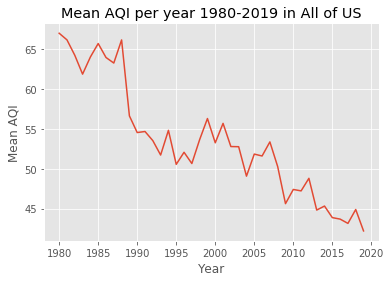

In [527]:
fig, ax = plt.subplots()
ax.plot(historic_month_comparison1['Year'], historic_month_comparison1['AQI'])
ax.set_title('Mean AQI per year 1980-2019 in All of US')
ax.set_xlabel('Year')
ax.set_ylabel('Mean AQI')
plt.savefig('img/historic_yearly_aqi.jpg')
plt.show()

In [584]:
combo_mean_aqi['AQI_dif'] = combo_mean_aqi['AQI_2019'] - combo_mean_aqi['AQI_2020']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [598]:
combo_mean_aqi[['CBSA', 'AQI_dif']].sort_values('AQI_dif', ascending=False)

,CBSA,AQI_dif
30,"Los Angeles-Long Beach-Anaheim, CA",31.025366
44,"Providence-Warwick, RI-MA",21.324012
47,"Sacramento--Roseville--Arden-Arcade, CA",21.032787
34,"Minneapolis-St. Paul-Bloomington, MN-WI",15.352459
38,"New York-Newark-Jersey City, NY-NJ-PA",13.676230
42,"Pittsburgh, PA",12.647541
3,"Atlanta-Sandy Springs-Roswell, GA",11.483607
50,"San Francisco-Oakland-Hayward, CA",11.172131
5,"Baltimore-Columbia-Towson, MD",9.385246
7,"Bozeman, MT",9.114754
